<img src="image.jpg">

 # PyPRT - Creation of 3D GIS Content

 Description: this notebook is used to test the integration of pyprt module into a Jupyter Notebook.

In [1]:
import sys
import os

import pyprt
from pyprt.pyprt_arcgis import arcgis_to_pyprt

In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy

import arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import Geometry
from arcgis.features import SpatialDataFrame
from arcgis.features import FeatureLayerCollection
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.mapping import WebScene
from arcgis.mapping import SceneLayer

In [3]:
CS_FOLDER = os.getcwd()


def asset_file(filename):
    return os.path.join(CS_FOLDER, filename)

In [4]:
my_gis = GIS(username="CLechot_zurich")

Enter password: ········


In [5]:
print("\nInitializing PRT.")
pyprt.initialize_prt()

if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")


Initializing PRT.
[PRT] [2020-01-22 14:44:09] [info] Esri Procedural Runtime
[PRT] [2020-01-22 14:44:09] [info] Version: 2.1.5704 | Build Date: Tue 09/03/2019 06:40 PM | Build Config: PRT_BC_REL PRT_CC_OPT PRT_TC_VC141 | OS: win32 | ARCH: x86_64
[PRT] [2020-01-22 14:44:09] [debug] prtPlugins item 0: 'c:\users\cami9495\documents\esri-cityengine-sdk-master\examples\py4prt\pyprt\pyprt\lib'
[PRT] [2020-01-22 14:44:09] [error] failed to load library: error while loading library 'c:\users\cami9495\documents\esri-cityengine-sdk-master\examples\py4prt\pyprt\pyprt\lib\com.esri.prt.unreal.dll': The specified module could not be found.

[PRT] [2020-01-22 14:44:09] [warning] failed to load library com.esri.prt.unreal.dll
[PRT] [2020-01-22 14:44:09] [error] failed to load library: error while loading library 'c:\users\cami9495\documents\esri-cityengine-sdk-master\examples\py4prt\pyprt\pyprt\lib\DatasmithSDK.dll': The specified module could not be found.

[PRT] [2020-01-22 14:44:09] [warning] faile

 ### Get building parcels from ArcGIS Online

<Item title:"Zurich Parcels Shapefile" type:Feature Layer Collection owner:CLechot_zurich>
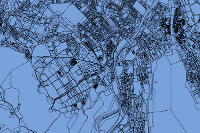

In [6]:
layer = my_gis.content.search("Zurich Parcels Shapefile", "Feature Layer")[0]
layer

In [7]:
map1 = my_gis.map()
location = geocode("Zurich")[0]
map1.extent = layer.extent
map1.add_layer(layer)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
data_layer = pd.DataFrame.spatial.from_layer(layer.layers[0])

### Filter the parcels to redevelop

In [ ]:
filtered_data = data_layer.loc[data_layer['Shape__Area'] < 200]

In [ ]:
filtered_data2 = filtered_data.loc[filtered_data['Shape__Area'] > 195]

In [ ]:
data_layer.shape, filtered_data2.shape

In [ ]:
map2 = my_gis.map()
filtered_data2.spatial.plot(kind='map', map_widget=map2)
map2.extent = layer.extent
map2

### Get the parcels geometry

In [13]:
filtered_set = layer.layers[0].query(
    where='Shape__Area<200 and Shape__Area>195')
filtered_set

<FeatureSet> 84 features

In [14]:
initial_geometries = arcgis_to_pyprt(filtered_set)

### PRT Generation

<Item title:"Building_From_Footprint" type:Rule Package owner:CLechot_zurich>
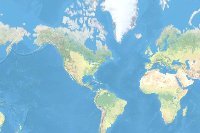

In [15]:
rpk = my_gis.content.search("Building_From_Footprint", "Rule Package")[0]
rpk

In [16]:
attrs = {'ruleFile': "rules/Buildings/Building_From_Footprint.cgb",
         'startRule': "Default$Generate", 'Reporting': "All"}

In [17]:
export_file_name = "Demo_SLPKModelExportParcels"
enc_optionsSLPK = {'sceneType': "Local", 'baseName': export_file_name, 'sceneWkid': "3857", 'layerTextureEncoding': ["2"], 'layerEnabled': [True], 'layerUID': ["1"], 'layerName': ["1"], 'layerTextureQuality': [
    1.0], 'layerTextureCompression': [9], 'layerTextureScaling': [1.0], 'layerTextureMaxDimension': [2048], 'layerFeatureGranularity': ["0"], 'layerBackfaceCulling': [False], 'outputPath': os.path.join(CS_FOLDER, 'output')}
os.makedirs(enc_optionsSLPK['outputPath'], exist_ok=True)

In [18]:
mod_parcel = pyprt.ModelGenerator(initial_geometries)
generated_mod_parcel = mod_parcel.generate_model(
    [attrs], rpk.download(), "com.esri.prt.codecs.I3SEncoder", enc_optionsSLPK)

[PRT] [2020-01-07 14:29:58] [info] using rule package C:\Users\cami9495\AppData\Local\Temp\Building_From_Footprint5.rpk

[PRT] [2020-01-07 14:29:58] [debug] resolve map = <ResolveMap>
	<attribute key="assets/Facades/International/Groundfloors/g_f001_t006_Mercantile_006.jpg" value="rpk:file:/C:%5CUsers%5Ccami9495%5CAppData%5CLocal%5CTemp%5CBuilding_From_Footprint5.rpk!/assets/Facades/International/Groundfloors/g_f001_t006_Mercantile_006.jpg" type="str"/>
	<attribute key="/ESRI.lib/assets/Facades/International/Groundfloors/g_f001_t007_Mercantile_000.jpg" value="rpk:file:/C:%5CUsers%5Ccami9495%5CAppData%5CLocal%5CTemp%5CBuilding_From_Footprint5.rpk!/assets/Facades/International/Groundfloors/g_f001_t007_Mercantile_000.jpg" type="str"/>
	<attribute key="assets/Facades/International/Groundfloors/g_f001_t006_Residential_013.jpg" value="rpk:file:/C:%5CUsers%5Ccami9495%5CAppData%5CLocal%5CTemp%5CBuilding_From_Footprint5.rpk!/assets/Facades/International/Groundfloors/g_f001_t006_Residential_013.

[PRT] [2020-01-07 14:29:58] [debug] width 1002, height 1002, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 512, height 128, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 128, height 128, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 1002, height 1002, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 512, height 128, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 128, height 128, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 1002, height 1002, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 512, height 128, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 128, height 128, rasterCount 3
[PRT] [2020-01-07 14:29:58] [debug] width 1002, height 1002, rasterCount 3
[PRT] [2020-01-07 14:29:59] [debug] width 1024, height 512, rasterCount 3
[PRT] [2020-01-07 14:29:59] [debug] width 1024, height 512, rasterCount 3
[PRT] [2020-01-07 14:29:59] [debug] width 1024, height 512, rasterCount 3
[PRT] [2020-01-07 14:29:59] [debug] widt

 ### From Python to ArcGIS

In [25]:
item_to_upload = my_gis.content.add({'type': 'Scene Package', 'tags': 'slpk'}, data=asset_file(
    "..\output\%s.slpk" % export_file_name), folder='packages')

In [26]:
published_item = item_to_upload.publish(overwrite=True)

In [27]:
display(published_item)

<Item title:"Demo_SLPKModelExportParcels" type:Scene Layer owner:CLechot_zurich>

In [28]:
source = 'http://zurich.maps.arcgis.com/home/webscene/viewer.html?layers=' + \
    published_item.id

In [29]:
from IPython.display import IFrame

IFrame(src=source, width=900, height=600)

In [30]:
pyprt.shutdown_prt()